In [1]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
from bs4 import BeautifulSoup
import requests
import pandas
options = Options()
options.add_argument("--disable-notifications")
driver = webdriver.Chrome(ChromeDriverManager().install())

driver.get("https://hk.finance.yahoo.com/quote/2330.TW/history?period1=1332547200&period2=1648080000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true")


for x in range(1,50):
    height = driver.execute_script("return document.documentElement.scrollHeight")
    driver.execute_script("window.scrollTo(0, " + str(height) + ");")
    time.sleep(0.1)




====== WebDriver manager ======
Current google-chrome version is 101.0.4951
Get LATEST chromedriver version for 101.0.4951 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/101.0.4951.41/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\bt\.wdm\drivers\chromedriver\win32\101.0.4951.41]
c:\users\bt\anaconda3\envs\big\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  # Remove the CWD from sys.path while we load stuff.


In [2]:
soup = BeautifulSoup(driver.page_source)
a = pandas.read_html(soup.prettify())


In [3]:
a[0]

,日期,開市,最高,最低,收市*,經調整收市價**,成交量
0,2022年3月23日,590.00,590.00,586.00,590.00,590.00,25902069
1,2022年3月22日,577.00,586.00,577.00,583.00,583.00,20246949
2,2022年3月21日,583.00,589.00,583.00,586.00,586.00,21400273
3,2022年3月18日,582.00,582.00,576.00,581.00,581.00,46242430
4,2022年3月17日,578.00,583.00,575.00,582.00,582.00,60959900
...,...,...,...,...,...,...,...
2466,2012年3月29日,84.50,84.50,83.40,84.10,60.93,49391000
2467,2012年3月28日,86.50,86.50,84.60,85.50,61.94,28246000
2468,2012年3月27日,85.00,85.80,84.30,85.80,62.16,34236000
2469,2012年3月26日,85.10,85.10,82.50,83.60,60.56,58830000


In [4]:
opening = []
hight = []
low = []
close = []
volume = []
date = []
adjclose = []
for i in range(len(a[0])):
    if '股' not in a[0]['開市'][i] :
        if '-' not in a[0]['成交量'][i] :
            if '價' not in a[0]['開市'][i]:
                opening.append(float(a[0]['開市'][i]))
                hight.append(float(a[0]['最高'][i]))
                low.append(float(a[0]['最低'][i]))
                close.append(float(a[0]['收市*'][i]))
                volume.append(float(a[0]['成交量'][i]))
                date.append(a[0]['日期'][i])
                adjclose.append(a[0]['經調整收市價**'][i])
                print(i)
date = list(reversed(date))
opening = list(reversed(opening))
hight = list(reversed(hight))
low = list(reversed(low))
close = list(reversed(close))
volume = list(reversed(volume))
adjclose = list(reversed(adjclose))
import re
dat = []
for i in range(len(date)):
    a = re.sub('年','-',date[i])
    b = re.sub('月','-',a)
    c = re.sub('日','-',b)
    dat.append(c)

0
1
2
3
4
5
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282

1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176


In [5]:
len(volume)

2438

In [6]:
import re
dat = []
for i in range(len(date)):
    a = re.sub('年','-',date[i])
    b = re.sub('月','-',a)
    c = re.sub('日','',b)
    dat.append(c)

In [7]:
full = pandas.DataFrame(( zip(opening,hight,low,close,volume)),columns = ['open','hight','low','close','volume'])

In [8]:
full['updown'] = 0
for i in range(len(full)-1):
    if float(full['close'][i]) > float(full['open'][i+1]):
        full['updown'][i] = 1#1為長0為跌
        

c:\users\bt\anaconda3\envs\big\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
train = full[1:]
test = full[1:]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pandas.DataFrame(scaler.fit_transform(train), columns=full.columns)
test = pandas.DataFrame(scaler.fit_transform(test), columns=full.columns)


In [10]:
import tqdm #進度條 好看用的
n = 30 #用過去30天 x 預測 y資料 , 1/4起，所以能預測的第一個Y為2/3
feature_names = list(train.drop('updown', axis=1).columns)
X = []
y = []
indexes = []
norm_data_x = train[feature_names]
for i in tqdm.tqdm_notebook(range(0,len(train)-n)): 
    X.append(norm_data_x.iloc[i:i+n]. values) #iloc[n,m]是取n,m那格數字 iloc[n:m]是取n*m那些數字
    y.append(train['updown'].iloc[i+n-1]) #現有資料+30天的Y
    indexes.append(train.index[i+n-1]) #Y的日期

c:\users\bt\anaconda3\envs\big\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/2407 [00:00<?, ?it/s]

In [11]:
len(feature_names)

5

In [12]:
norm_data_x.iloc[1:5].values

array([[0.01997708, 0.01908023, 0.01787488, 0.01839987, 0.16933135],
       [0.01670215, 0.01581866, 0.01588878, 0.01609989, 0.29655333],
       [0.01539217, 0.01647097, 0.01506124, 0.01741416, 0.2624931 ],
       [0.01719338, 0.01696021, 0.01688183, 0.01774273, 0.14152242]])

In [13]:
X

[array([[0.01752088, 0.01793868, 0.01737835, 0.01889272, 0.20537106],
        [0.01997708, 0.01908023, 0.01787488, 0.01839987, 0.16933135],
        [0.01670215, 0.01581866, 0.01588878, 0.01609989, 0.29655333],
        [0.01539217, 0.01647097, 0.01506124, 0.01741416, 0.2624931 ],
        [0.01719338, 0.01696021, 0.01688183, 0.01774273, 0.14152242],
        [0.01752088, 0.01663405, 0.01655081, 0.01757845, 0.18735121],
        [0.01473719, 0.01500326, 0.01539225, 0.01445704, 0.25596504],
        [0.01588341, 0.01500326, 0.01539225, 0.01560703, 0.20438433],
        [0.01260848, 0.01435095, 0.01357167, 0.01429276, 0.13902551],
        [0.01440969, 0.01418787, 0.01324065, 0.01264991, 0.19993201],
        [0.01260848, 0.01418787, 0.01307514, 0.01330705, 0.24432884],
        [0.01342721, 0.01288324, 0.01274412, 0.01363562, 0.22003363],
        [0.01490093, 0.01663405, 0.01473022, 0.01741416, 0.268239  ],
        [0.01686589, 0.01663405, 0.01655081, 0.01741416, 0.11647512],
        [0.01735713,

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM
import numpy
n_steps = 30 #前幾天的資料
n_features = 5#用幾個欄位
model = Sequential()
model.add(LSTM(30,activation='relu', return_sequences=False, input_shape = (n_steps, n_features)))
#model.add(神經元數量,激活函數,輸出是否為時間序列 如果輸出為兩個以上值 就是序列 要寫True,input_shape(幾步,幾個特徵))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse' , metrics=['mse','mape','accuracy'])

In [15]:
history = model.fit(numpy.array(X),numpy.array(y),batch_size = 100,epochs = 30)

Epoch 1/30
25/25 [==============================] - 2s 9ms/step - loss: 0.2896 - mse: 0.2896 - mape: 149045520.0000 - accuracy: 0.5870
Epoch 2/30
25/25 [==============================] - 0s 9ms/step - loss: 0.2431 - mse: 0.2431 - mape: 225050880.0000 - accuracy: 0.5962
Epoch 3/30
25/25 [==============================] - 0s 9ms/step - loss: 0.2416 - mse: 0.2416 - mape: 236296656.0000 - accuracy: 0.5974
Epoch 4/30
25/25 [==============================] - 0s 9ms/step - loss: 0.2409 - mse: 0.2409 - mape: 230642288.0000 - accuracy: 0.5958
Epoch 5/30
25/25 [==============================] - 0s 9ms/step - loss: 0.2406 - mse: 0.2406 - mape: 237262816.0000 - accuracy: 0.5999
Epoch 6/30
25/25 [==============================] - 0s 9ms/step - loss: 0.2401 - mse: 0.2401 - mape: 230393040.0000 - accuracy: 0.6020
Epoch 7/30
25/25 [==============================] - 0s 9ms/step - loss: 0.2404 - mse: 0.2404 - mape: 237260960.0000 - accuracy: 0.5995
Epoch 8/30
25/25 [==============================] - 0s 

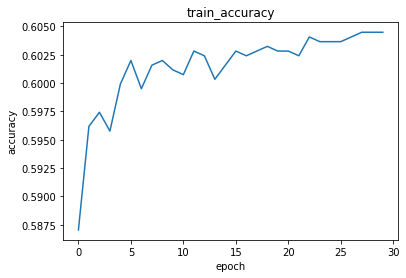

In [16]:
from matplotlib import pyplot as plt
plt.title("train_accuracy")
plt.ylabel ('accuracy')
plt.xlabel('epoch')
plt.plot(history.history["accuracy"])

In [17]:
print(history.__dict__)

{'validation_data': None, 'model': <keras.engine.sequential.Sequential object at 0x00000252909818C8>, '_chief_worker_only': None, '_supports_tf_logs': False, 'history': {'loss': [0.2895534932613373, 0.24310772120952606, 0.24163976311683655, 0.2408679723739624, 0.24056239426136017, 0.24011480808258057, 0.24036970734596252, 0.239802747964859, 0.24033676087856293, 0.23967605829238892, 0.23956458270549774, 0.24037274718284607, 0.2394123375415802, 0.23961563408374786, 0.23982706665992737, 0.2392529398202896, 0.23999717831611633, 0.2390785813331604, 0.2390400916337967, 0.23923739790916443, 0.23903053998947144, 0.2391975075006485, 0.24089235067367554, 0.23929141461849213, 0.2394208312034607, 0.23875312507152557, 0.24023465812206268, 0.2387647181749344, 0.23871059715747833, 0.23852381110191345], 'mse': [0.28955352306365967, 0.24310775101184845, 0.24163976311683655, 0.2408679723739624, 0.24056239426136017, 0.24011480808258057, 0.2403697371482849, 0.239802747964859, 0.24033679068088531, 0.239676

In [18]:
predictions= model.predict(numpy.array(X))#丟到模型做預測
predictions = pandas.DataFrame(predictions).rename(columns={0:'預測值'})#轉成DataFrame格式
predictions#x的預測值

y_test = pandas.DataFrame(numpy.array(y)).rename(columns={0 : "實際值"})


final = pandas.concat([predictions,y_test],axis = 1)#合併

final["mae"] = abs(final["預測值"]-final["實際值"])


In [19]:
predictions= model.predict(numpy.array(X))#丟到模型做預測
predictions

array([[0.41357568],
       [0.40932414],
       [0.40766627],
       ...,
       [0.43536317],
       [0.4328057 ],
       [0.42791307]], dtype=float32)

In [20]:
for i  in range(len(final['預測值'])):
    if float(final['預測值'][i]) < 0.5:
        final['預測值'][i] = 0
    if float(final['預測值'][i]) >= 0.5:
        final['預測值'][i] = 1
        

c:\users\bt\anaconda3\envs\big\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
a = 0
for i in range(len(final['預測值'])):
    if final['預測值'][i] == final['實際值'][i] :
        a+=1    
print(a/len(final['預測值']))

0.6044869131699211


In [30]:
df

,Volume,Open,High,Low,Close
2012-05-09,40753000.0,83.9,85.2,83.5,84.6
2012-05-10,28381000.0,85.0,85.7,84.3,85.3
2012-05-11,33565000.0,85.7,85.7,84.5,85.5
2012-05-14,13924000.0,84.8,85.5,84.8,85.4
2012-05-15,30654000.0,85.4,85.7,84.1,85.5
...,...,...,...,...,...
2022-03-16,43438327.0,564.0,565.0,555.0,558.0
2022-03-17,60959900.0,578.0,583.0,575.0,582.0
2022-03-18,46242430.0,582.0,582.0,576.0,581.0
2022-03-21,21400273.0,583.0,589.0,583.0,586.0


In [22]:
df = {'Date':dat,
      'Volume':volume,
       'Open':opening,
      'High':hight,
      'Low': low,
      'Close':close,
      }


In [23]:
df = pandas.DataFrame(df)


df.drop(df.head(30).index,inplace=True)
df.drop(df.tail(1).index,inplace = True)

In [24]:
df.set_index('Date', inplace = True)

In [25]:
df.index = pandas.to_datetime(df.index)

In [26]:
from backtesting import Backtest, Strategy




class Strategy(Strategy): #交易策略命名為SmaClass，使用backtesting.py的Strategy功能
    
    def init(self):
        price = self.data.Close
        self.dataclose = self.data.Close
        self.dataopen = self.data.Open
        self.datahigh = self.data.High
        self.datalow = self.data.Low
        self.datavolume = self.data.Volume
    def next(self):
        close = []
        opening = []
        high = []
        low = []
        volume = []
        for i in range(0,-30,-1):
            close.append(self.dataclose[i])
            opening.append(self.dataopen[i])
            high.append(self.datahigh[i])
            low.append(self.datalow[i])
            
            volume.append(self.datavolume[i])
        o = pandas.DataFrame(( zip(opening,high,low,close,volume)),columns = ['open','hight','low','close','volume'])
        train = pandas.DataFrame(scaler.fit_transform(o))
        feature_names = list(train)
        X = []
        X.append(train[feature_names].values)
        predictions = model.predict(numpy.array(X))
        if predictions >0.5:
            self.buy()
        if predictions <=0.5:
            self.sell()
            

c:\users\bt\anaconda3\envs\big\lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [27]:
test = Backtest(df, Strategy, cash=600000, commission=.002,exclusive_orders = True)
m = test.run()
test.plot()

Row(id='1408', ...)

In [28]:
m

Start                     2012-05-09 00:00:00
End                       2022-03-22 00:00:00
Duration                   3604 days 00:00:00
Exposure Time [%]                   98.545908
Equity Final [$]                     596.0744
Equity Peak [$]                    644089.182
Return [%]                         -99.900654
Buy & Hold Return [%]              589.125296
Return (Ann.) [%]                  -51.513859
Volatility (Ann.) [%]               11.382415
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -99.907562
Avg. Drawdown [%]                  -22.459246
Max. Drawdown Duration     3578 days 00:00:00
Avg. Drawdown Duration      721 days 00:00:00
# Trades                                 2370
Win Rate [%]                        40.337553
Best Trade [%]                       7.842441
Worst Trade [%]                     -10.56596
Avg. Trade [%]                    

In [29]:
test